<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

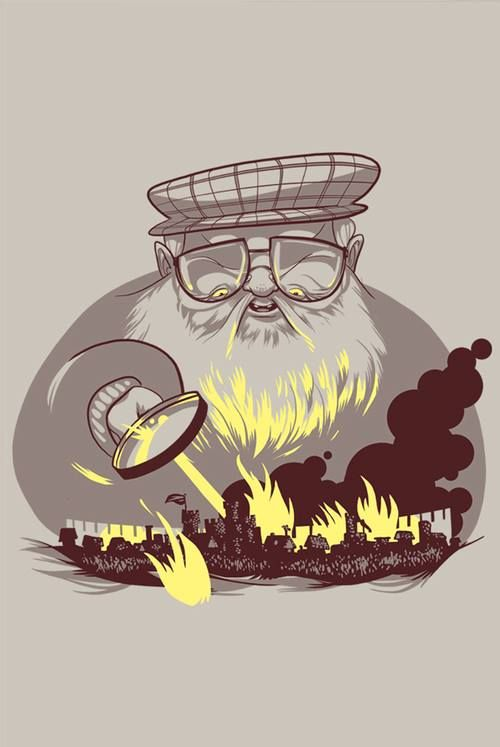

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [14]:
import gdown

gdown.download(id='1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S') # test dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: e:\Iliushina_files\DLS\1_part\game_of_thrones_test.csv
100%|██████████| 38.3k/38.3k [00:00<00:00, 38.3MB/s]


'game_of_thrones_test.csv'

In [15]:
gdown.download(id='1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV') # train dataset

Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: e:\Iliushina_files\DLS\1_part\game_of_thrones_train.csv
100%|██████████| 141k/141k [00:00<00:00, 2.65MB/s]


'game_of_thrones_train.csv'

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import clear_output

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [188]:
data_train = pd.read_csv(r'E:\Iliushina_files\DLS\1_part\game_of_thrones_train.csv')
data_train.set_index('S.No', inplace=True)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<BarContainer object of 26 artists>

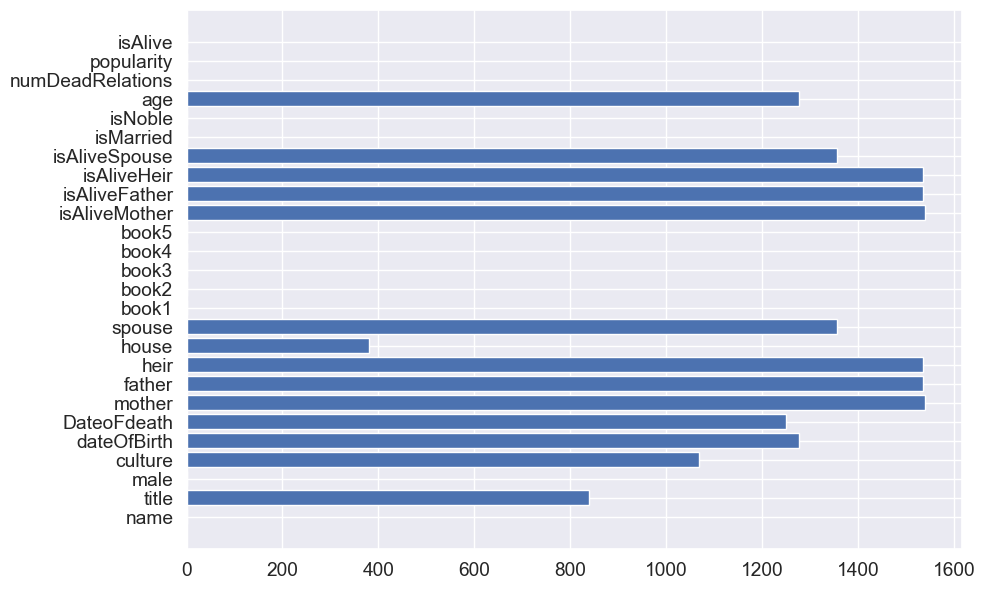

In [189]:
data = data_train.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data.index, data.values)

Много данных у некоторых признаков пропущено, поэтому большинство признаков вообще можно удалить, чтобы не добавлять среднюю информацию 'age','isAliveSpouse','isAliveMother', 'isAliveFather',
       'isAliveHeir','spouse', 'heir','mother', 'father', 'DateoFdeath','dateOfBirth'

In [190]:
data_train.drop(["mother", "father", "heir", "spouse",'DateoFdeath'], axis=1, inplace=True)

<BarContainer object of 21 artists>

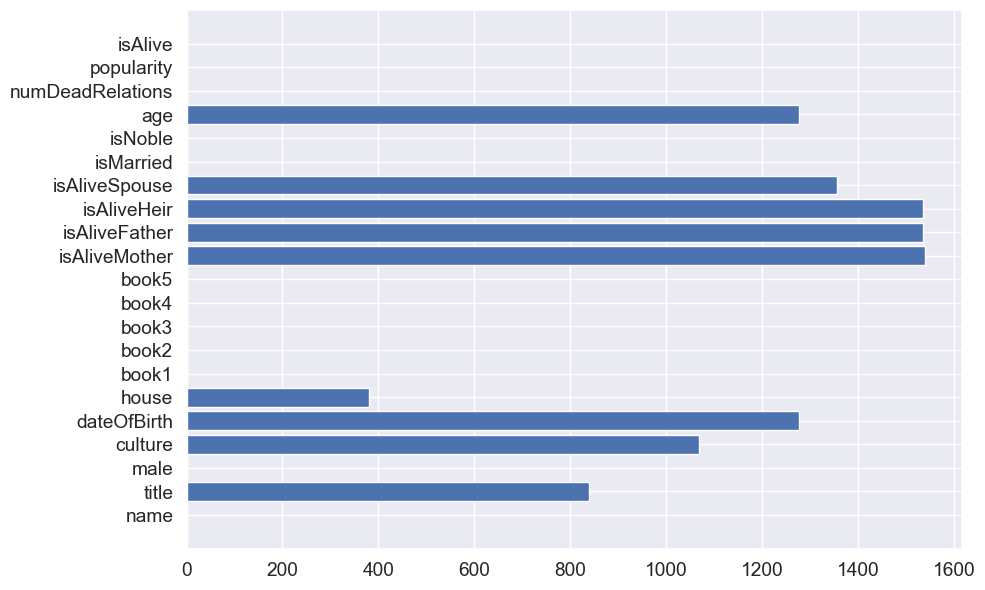

In [191]:
data = data_train.isna().sum()
plt.figure(figsize=(10,7))
plt.barh(data.index, data.values)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


убираем неопределенность в названии домав за счет фамилий

In [192]:
def extract_surname(x):
    return x.split()[-1]
#train
data_train['surname'] = data_train['name'].apply(extract_surname)

# Fill in the missing values in the 'house' column
data_train['house'].fillna(data_train['surname'].apply(lambda x: f"House {x}"), inplace=True)
data_train.drop(["surname"], axis=1, inplace=True)

C:\Users\Anna\AppData\Local\Temp\ipykernel_21800\3135254520.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['house'].fillna(data_train['surname'].apply(lambda x: f"House {x}"), inplace=True)


добавляем новый признак, присваивая им новые категории на основе частоты встречаемости и смертности

In [193]:
#признак, в котором будет отражено насколько часто в этой семье умирают люди

data_train['family_survival_rate'] = data_train.groupby('house')['isAlive'].transform(lambda x: x.mean())
mortality_dict = data_train.groupby('house')['isAlive'].mean().to_dict()

объединяем схожие названия культур

In [194]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [195]:
# Создаем обратный словарь для упрощения
culture_map = {name: culture for name, synonyms in cult.items() for culture in synonyms}

# Заменяем старые значения на новые
data_train['culture'] = data_train['culture'].replace(culture_map)

In [196]:
# те, которые не знаем отделяем отдельной категорией
data_train['culture'].fillna('Unknown', inplace=True)
clear_output(wait=False)

In [197]:
#создаем признак boolDeadRelations
data_train['isPopular'] = (data_train['popularity'] >= 0.5).astype(int)
data_train.drop(["popularity"], axis=1, inplace=True)
data_train['boolDeadRelations'] = (data_train['numDeadRelations'] > 0).astype(int)


In [198]:
#титулы особо ни с чем не коррелируют, поэтому лучше их заполнить 'Unknown', чем заполнять медианным значением(Ser)
data_train['title'].fillna('Unknown', inplace=True)
clear_output(wait=False)

Среднее = 35.29032258064516
Медиана = 24.0


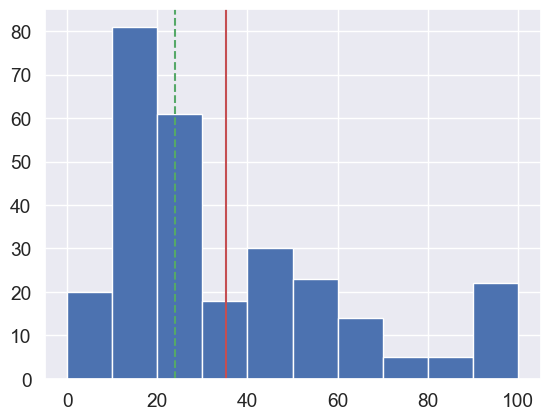

In [199]:
mean_Age = np.mean(data_train['age'].dropna().values)
median_Age = np.quantile(data_train['age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

plt.hist(data_train['age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

In [200]:
data_train["age"].fillna(data_train["age"][data_train["age"].notna()].mean(), inplace=True)
data_train['isAliveMother'].fillna(-1, inplace=True)
data_train['isAliveFather'].fillna(-1, inplace=True)
data_train['isAliveHeir'].fillna(-1, inplace=True)
data_train['isAliveSpouse'].fillna(-1, inplace=True)
data_train["dateOfBirth"].fillna(-1, inplace=True)

clear_output(wait=False)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [201]:
data_train.drop(columns=["name"], inplace = True)

от ненужного мы уже избавились, дальше только смотреть на корреляцию

In [202]:
data_train.columns

Index(['title', 'male', 'culture', 'dateOfBirth', 'house', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'isAlive', 'family_survival_rate', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

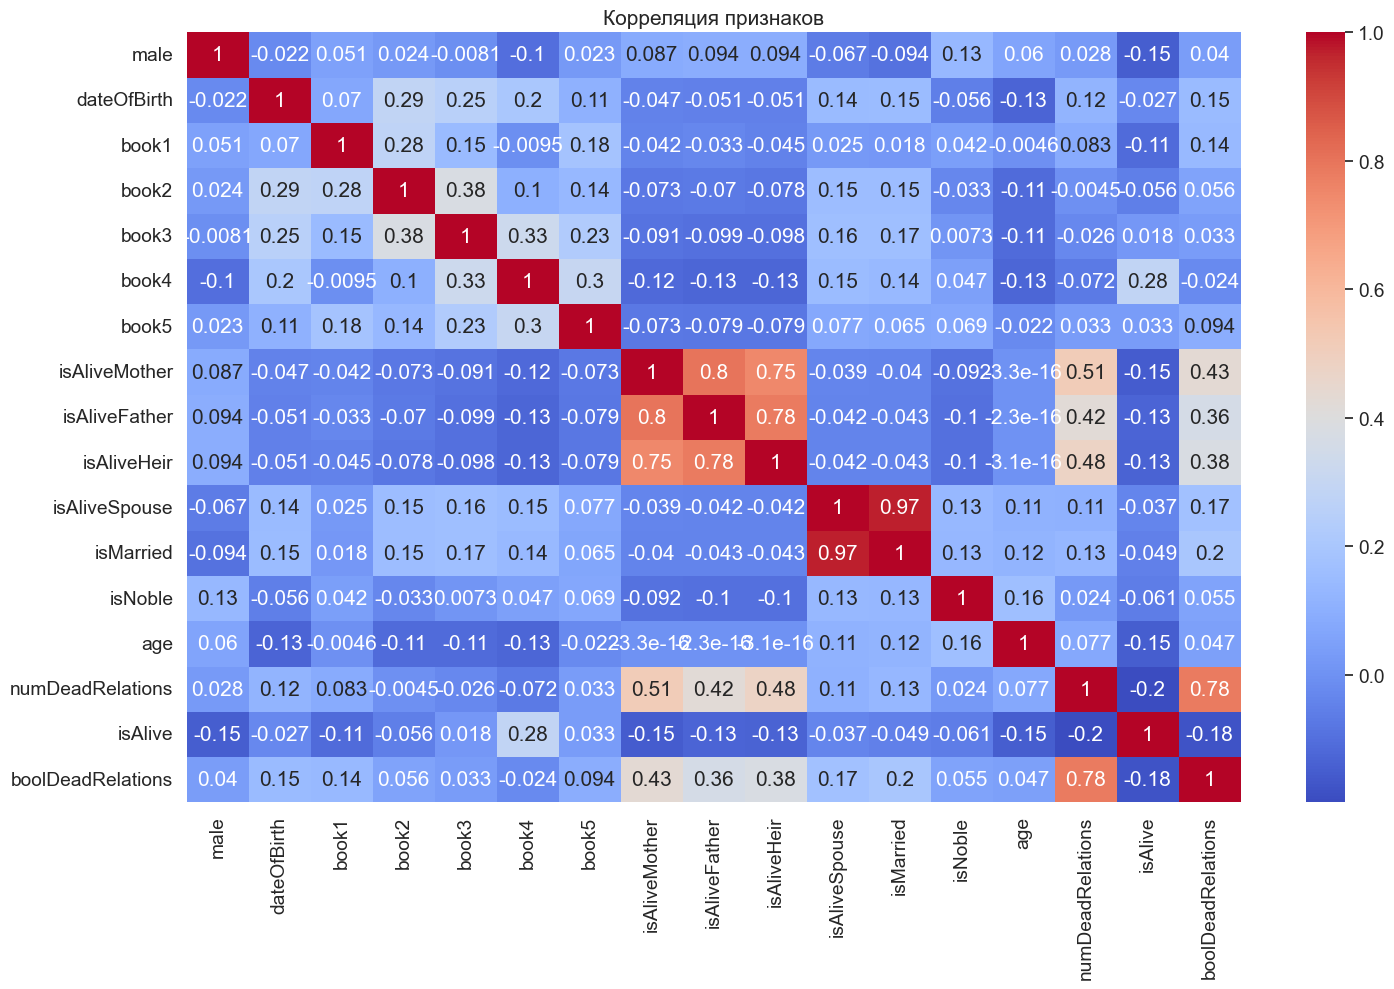

In [203]:
correlation_matrix = data_train[['male', 'dateOfBirth', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'isAlive', 'boolDeadRelations']].corr()
f, ax = plt.subplots(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

Удаляем значения, которые сильно коррелируют между собой и слабо с целевой переменной

In [204]:
data_train = data_train.drop(["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "isPopular", "numDeadRelations"], axis=1)

In [134]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   male                  1557 non-null   int64  
 1   dateOfBirth           1557 non-null   float64
 2   book1                 1557 non-null   int64  
 3   book2                 1557 non-null   int64  
 4   book3                 1557 non-null   int64  
 5   book4                 1557 non-null   int64  
 6   book5                 1557 non-null   int64  
 7   isMarried             1557 non-null   int64  
 8   isNoble               1557 non-null   int64  
 9   age                   1557 non-null   float64
 10  isAlive               1557 non-null   int64  
 11  family_survival_rate  1557 non-null   float64
 12  boolDeadRelations     1557 non-null   int32  
dtypes: float64(3), int32(1), int64(9)
memory usage: 164.2 KB


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [135]:
data_train['isAlive'].value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

Ответ: целевая переменная категориальная и датасет несбалансированный, поэтому нужно попробовать взвешивание классов или oversampling

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

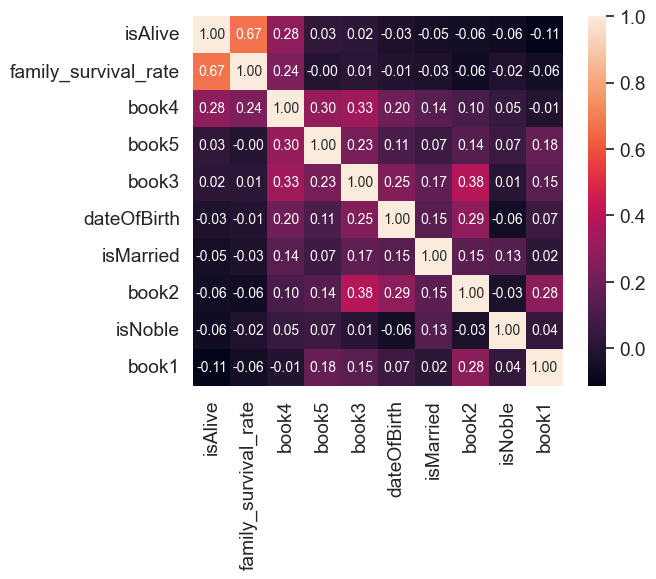

In [205]:
import numpy as np

df_numeric = data_train.select_dtypes(include=np.number)
corrmat = df_numeric.corr()
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_numeric[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Обработаем тестовые данные

In [212]:
data_test = pd.read_csv("game_of_thrones_test.csv", index_col="S.No")
data_test['family_survival_rate'] = data_test['house'].map(mortality_dict)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)
data_test["age"].fillna(data_test["age"][data_test["age"].notna()].mean(), inplace=True)
data_test["dateOfBirth"].fillna(-1, inplace=True)
data_test['family_survival_rate'] = data_test['family_survival_rate'].fillna(-1)
data_test.drop(["mother", "father", "heir", "spouse", 'DateoFdeath'], axis=1, inplace=True)
data_test.drop(columns=["name"], inplace = True)
data_test.drop(["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse",'popularity','numDeadRelations'], axis=1,  inplace=True)
data_test['title'].fillna('Unknown', inplace=True)
data_test['culture'].fillna('Unknown', inplace=True)
data_test.isna().sum(axis=0)

clear_output(wait=False)

In [233]:
data_train

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,family_survival_rate,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,Unknown,1,Unknown,-1.0,House Targaryen,0,0,0,0,0,0,0,35.290323,0,0.222222,1
2,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.000000,1,0.890110,1
3,Ser,1,Unknown,-1.0,House Swyft,0,0,0,1,0,0,1,35.290323,1,1.000000,0
4,Queen,0,Unknown,82.0,House Arryn,0,0,0,0,0,1,1,23.000000,0,0.636364,0
5,Greenstone,0,dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.000000,1,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Unknown,-1.0,House Marwyn,1,0,1,1,0,0,1,35.290323,1,1.000000,0
1554,Unknown,0,Unknown,-1.0,House Heddle,1,1,0,0,0,0,0,35.290323,0,0.333333,0
1555,Unknown,1,Unknown,-1.0,House Seaworth,0,1,1,1,1,0,0,35.290323,0,0.428571,0


In [232]:
data_test

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,family_survival_rate,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,Unknown,0,Unknown,156.0,House Blackwood,0,0,0,0,1,0,0,100.000000,0.000000,0
1559,Unknown,0,Asshai,-1.0,R'hllor,0,1,1,1,1,0,0,-3701.032468,1.000000,0
1560,Unknown,0,Unknown,-1.0,Brotherhood without banners,0,0,1,1,0,0,0,-3701.032468,0.750000,0
1561,Ser,1,Unknown,-1.0,House Trant,1,1,1,1,1,0,1,-3701.032468,-1.000000,0
1562,Unknown,1,Riverlands,262.0,House Frey,1,1,1,1,1,1,0,38.000000,0.890110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Unknown,1,Westeros,-1.0,House Stark,1,1,1,1,1,0,0,-3701.032468,0.766667,0
1943,Unknown,1,Unknown,-1.0,House Bolton,0,1,0,1,1,0,0,-3701.032468,0.833333,0
1944,Unknown,1,Unknown,-1.0,NaN,1,1,1,1,1,0,0,-3701.032468,-1.000000,0


In [231]:
from sklearn.preprocessing import LabelEncoder

train_df = data_train.copy()
test_df = data_test.copy()
# Combine the two dataframes
combined_df = pd.concat([train_df, test_df], axis=0)

# Encode categorical features using LabelEncoder()
le = LabelEncoder()

categorical_cols = combined_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
   combined_df[col] = le.fit_transform(combined_df[col])

# Split the encoded data back into train and test
train_encoded = combined_df.iloc[:len(train_df), :]
test_encoded = combined_df.iloc[len(train_df):, :]
test_encoded.drop(columns=["isAlive"], inplace = True)

C:\Users\Anna\AppData\Local\Temp\ipykernel_21800\3518704156.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_encoded.drop(columns=["isAlive"], inplace = True)


In [234]:
train_encoded

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,family_survival_rate,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,244,1,47,-1.0,554,0,0,0,0,0,0,0,35.290323,0.0,0.222222,1
2,151,1,39,208.0,222,1,1,1,1,1,1,1,97.000000,1.0,0.890110,1
3,217,1,47,-1.0,548,0,0,0,1,0,0,1,35.290323,1.0,1.000000,0
4,194,0,47,82.0,53,0,0,0,0,0,1,1,23.000000,0.0,0.636364,0
5,68,0,60,276.0,510,0,0,0,1,0,1,1,29.000000,1.0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,3,1,47,-1.0,379,1,0,1,1,0,0,1,35.290323,1.0,1.000000,0
1554,244,0,47,-1.0,283,1,1,0,0,0,0,0,35.290323,0.0,0.333333,0
1555,244,1,47,-1.0,514,0,1,1,1,1,0,0,35.290323,0.0,0.428571,0


In [281]:
#from sklearn.preprocessing import OneHotEncoder
#
#train_df = data_train_clean
#test_df = data_test_clean
#combined = pd.concat([train_df, test_df], keys=['train', 'test'])

# Создаем и обучаем OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' чтобы избежать дамми-ловушек
#encoded_features = encoder.fit_transform(combined[categorical_columns])

# Получаем названия новых столбцов
#encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Создаем DataFrame с закодированными признаками
#encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=combined.index)

# Объединяем закодированные признаки с оригинальными данными и убираем старые категориальные столбцы
##combined = combined.join(encoded_df).drop(columns=categorical_columns)

# Разделяем обратно на train и test
#train_encoded = combined.xs('train')
#test_encoded = combined.xs('test')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

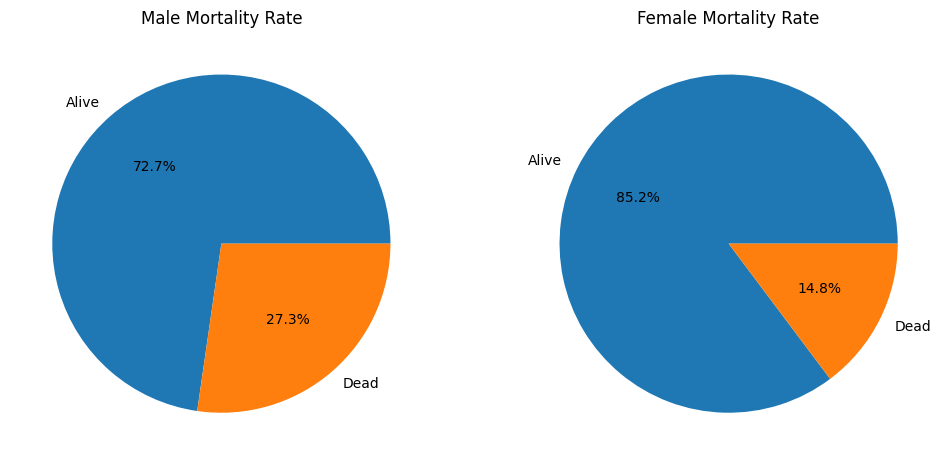

In [25]:
#data = data_train_clean['Embarked'].value_counts()

male_mortality = data_train[data_train['male'] == 1]['isAlive'].value_counts()
female_mortality = data_train[data_train['male'] == 0]['isAlive'].value_counts()

# Create two pie charts to visualize the distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(male_mortality, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[0].set_title('Male Mortality Rate')

ax[1].pie(female_mortality, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[1].set_title('Female Mortality Rate')

plt.show()

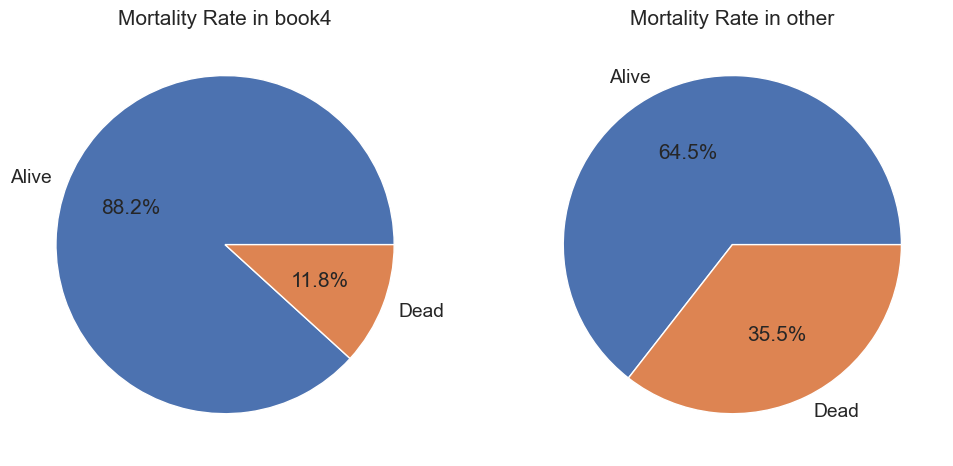

In [189]:
book4_data = data_train[data_train['book4'] == 1]['isAlive'].value_counts()
book4_not_data = data_train[data_train['book4'] == 0]['isAlive'].value_counts()

# Create two pie charts to visualize the distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(book4_data, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[0].set_title('Mortality Rate in book4')

ax[1].pie(book4_not_data, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[1].set_title('Mortality Rate in other')

plt.show()

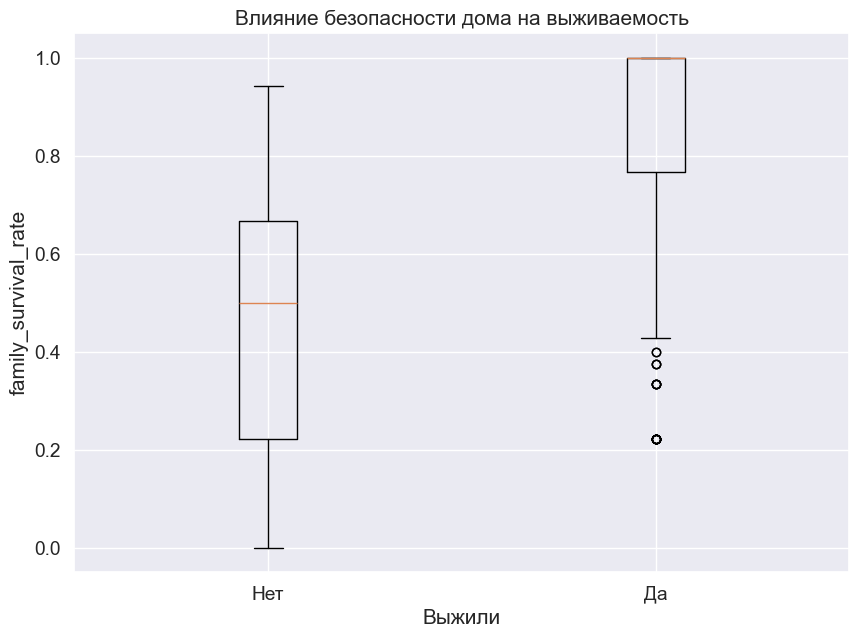

In [182]:
data1 = data_train['family_survival_rate'][data_train['isAlive'] == 0]
data2 = data_train['family_survival_rate'][data_train['isAlive'] == 1]

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Влияние безопасности дома на выживаемость')
plt.xlabel('Выжили')
plt.ylabel('family_survival_rate')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

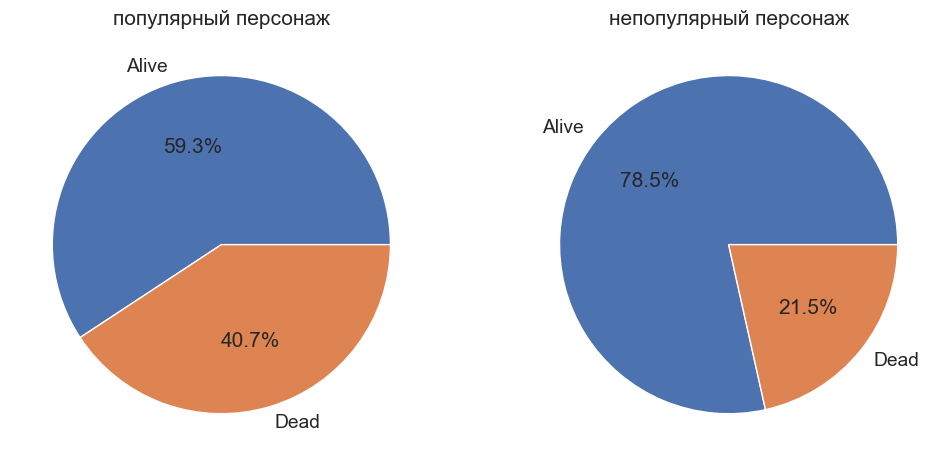

In [186]:
isPopular = data_train[data_train['isPopular'] == 1]['isAlive'].value_counts()
notPopular = data_train[data_train['isPopular'] == 0]['isAlive'].value_counts()

# Create two pie charts to visualize the distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(isPopular, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[0].set_title('популярный персонаж')

ax[1].pie(notPopular, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[1].set_title('непопулярный персонаж')

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [242]:
X = train_encoded.drop('isAlive', axis=1)
y = train_encoded['isAlive']

In [243]:
from imblearn.over_sampling import RandomOverSampler

# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(X, y)

In [244]:
test_encoded

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,family_survival_rate,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,244,0,47,156.0,83,0,0,0,0,1,0,0,100.000000,0.000000,0
1559,244,0,1,-1.0,661,0,1,1,1,1,0,0,-3701.032468,1.000000,0
1560,244,0,47,-1.0,8,0,0,1,1,0,0,0,-3701.032468,0.750000,0
1561,217,1,47,-1.0,576,1,1,1,1,1,0,1,-3701.032468,-1.000000,0
1562,244,1,38,262.0,222,1,1,1,1,1,1,0,38.000000,0.890110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,244,1,55,-1.0,534,1,1,1,1,1,0,0,-3701.032468,0.766667,0
1943,244,1,47,-1.0,90,0,1,0,1,1,0,0,-3701.032468,0.833333,0
1944,244,1,47,-1.0,677,1,1,1,1,1,0,0,-3701.032468,-1.000000,0


In [245]:
X_resampled

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,family_survival_rate,boolDeadRelations
0,244,1,47,-1.0,554,0,0,0,0,0,0,0,35.290323,0.222222,1
1,151,1,39,208.0,222,1,1,1,1,1,1,1,97.000000,0.890110,1
2,217,1,47,-1.0,548,0,0,0,1,0,0,1,35.290323,1.000000,0
3,194,0,47,82.0,53,0,0,0,0,0,1,1,23.000000,0.636364,0
4,68,0,60,276.0,510,0,0,0,1,0,1,1,29.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,28,1,66,284.0,120,0,1,1,1,1,0,1,15.000000,0.000000,1
2420,244,1,11,-1.0,5,0,0,1,0,0,0,0,35.290323,0.333333,0
2421,217,0,47,-1.0,200,0,0,0,1,0,0,1,35.290323,0.000000,0
2422,217,1,47,-1.0,556,1,1,1,0,0,0,1,35.290323,0.750000,0


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled.values, y_resampled.values, shuffle=True, test_size=0.2, random_state=44, stratify=y_resampled)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [219]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [220]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process  import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [247]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [222]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [248]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_valid)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8103


Аналогичным образом посчитайте метрику accuracy для остальных моделей

Проведем поиск гиперпараметров

In [249]:
from sklearn.model_selection import RandomizedSearchCV
def find_optimal_model_params(model, X, y, param_grid, n_iter=50, cv=5, scoring='accuracy'):

    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                               n_iter=n_iter, cv=cv, scoring=scoring, n_jobs=-1, verbose=3)
    grid_search.fit(X, y)

    # Return the model with the best parameters and the best parameters themselves
    return grid_search.best_estimator_

In [251]:
models = {
      'LogisticRegression': LogisticRegression(),
      'AdaBoost': AdaBoostClassifier(),
      'RandomForest': RandomForestClassifier(),
      'GaussianProcess': GaussianProcessClassifier(),
      'GaussianNB': GaussianNB(),
      'KNeighbors': KNeighborsClassifier(),
      'DecisionTree': DecisionTreeClassifier()
}

In [252]:
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_gaussian_process = {
    'max_iter_predict': [100, 200, 300],
    'n_restarts_optimizer': [0, 1, 5],
    'warm_start': [True, False]
}

param_grid_gaussian_nb = {
    # GaussianNB doesn't have many parameters to tune.
    # You can add priors if necessary, but the model is simple by default.
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_logistic_regression = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'newton-cg', 'sag'],  # Optimization algorithm
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],  # Only used if penalty is 'elasticnet'
}

In [253]:
params = {
      'LogisticRegression': param_grid_logistic_regression,
      'AdaBoost': param_grid_adaboost,
      'RandomForest': param_grid_random_forest,
      'GaussianProcess': param_grid_gaussian_process,
      'GaussianNB': param_grid_gaussian_nb,
      'KNeighbors': param_grid_knn,
      'DecisionTree': param_grid_decision_tree
}

In [254]:
best_model = None
best_accuracy = -1
best_model_name = None
for model_name in models.keys():
  print("current model is: ", model_name)
  candidate_model = find_optimal_model_params(models[model_name],
                            X_train,
                            y_train,
                            params[model_name])

  y_pred = candidate_model.predict(X_valid)
  candidate_accuracy = accuracy_score(y_valid, y_pred)

  y_pred = candidate_model.predict(test_encoded)
  new_submission = data_test.copy()
  new_submission["isAlive"] = y_pred
  new_submission = new_submission["isAlive"]
  new_submission.to_csv(r"E:\Iliushina_files\DLS\1_part\content\new_submission_{}_{}.csv".format(model_name, candidate_accuracy), index=False)

  if candidate_accuracy > best_accuracy:
    best_accuracy = candidate_accuracy
    best_model = candidate_model
    best_model_name = model_name
print('##############')
print(best_accuracy, best_model_name)

current model is:  LogisticRegression
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", 

current model is:  AdaBoost
Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


current model is:  RandomForest
Fitting 5 folds for each of 50 candidates, totalling 250 fits
current model is:  GaussianProcess
Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianProcessClassifier was fitted without feature names
  warnings.warn(
c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Anna\AppData\Local\Programs\Python\Python312\L

current model is:  GaussianNB
Fitting 5 folds for each of 4 candidates, totalling 20 fits
current model is:  KNeighbors
Fitting 5 folds for each of 48 candidates, totalling 240 fits
current model is:  DecisionTree
Fitting 5 folds for each of 50 candidates, totalling 250 fits
##############
0.9402061855670103 RandomForest


c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Anna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Наилучшую точность на валидационной выборке показал RandomForest: 0.94. Загруженный csv файл в проверочную систему Stepik показал точность 66%, что сильно противоречит полученным результатам. В чем причина я не знаю

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.